# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

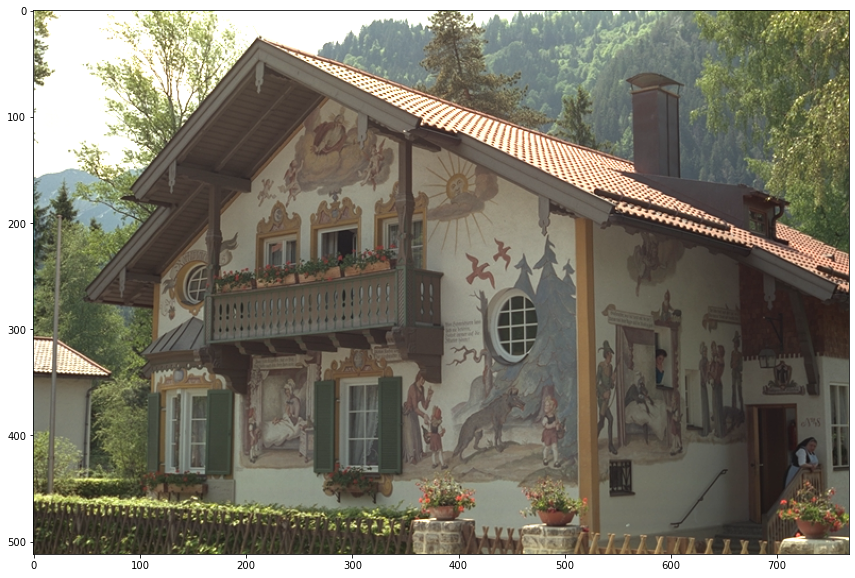

In [2]:
img = cv2.imread('data/kodim24.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255
img[img > 1] = 1
plt.imshow(img)

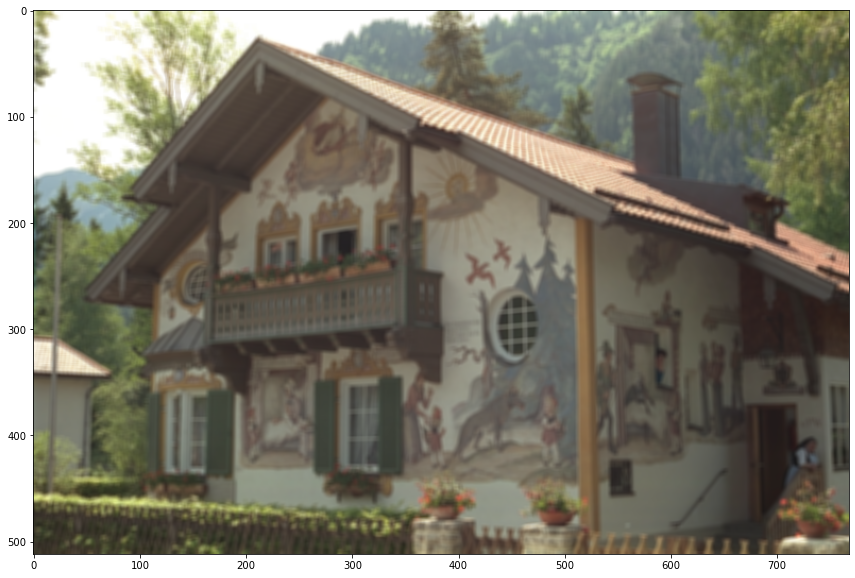

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
plt.imshow(unsharp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


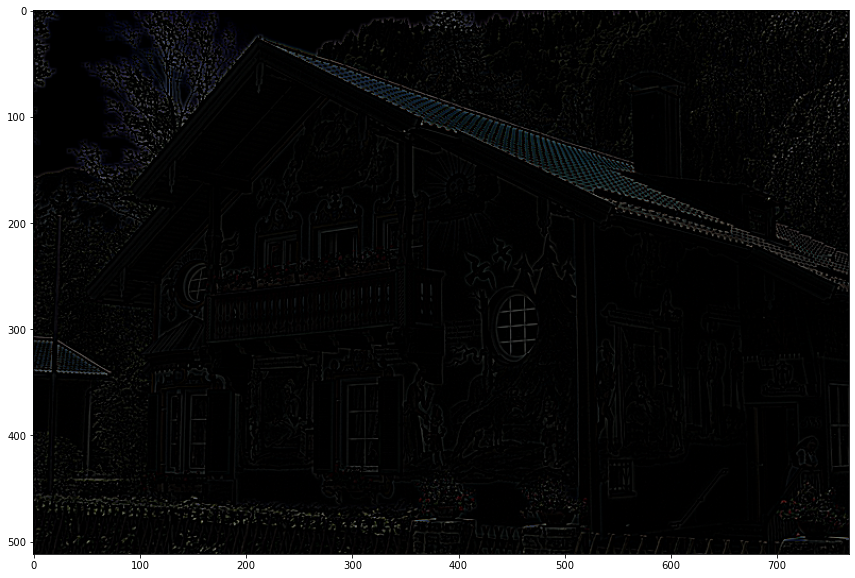

In [4]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

diff = img - unsharp
plt.imshow(diff)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1d002af0e80>)

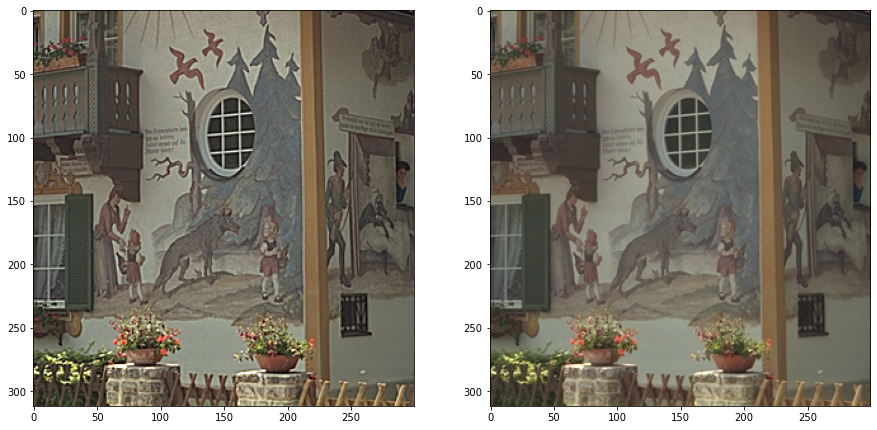

In [5]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 0.9;
sharpened = img+diff*amount

sharpened[sharpened < 0] = 0
sharpened[sharpened > 1] = 1

plt.subplot(121),plt.imshow(sharpened[200:600, 300:600, :])
plt.subplot(122),plt.imshow(img[200:600, 300:600, :])

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

In [6]:
#If the amount is too small then the UMS filter do not make any effect on the result 
#or the effect is very small.

In [7]:
#If the amount is too large then a edges of an elements on a picture will be over contrast
#for the visual perception it's not very good.  

#To improve of the sharpness the optimal value for the amount must be not more 1. 
#But for CV mission it can more that 1, for the edge detection, for example.